# 1D Heat Equation in an Infinite Solid
Consider the energy equation,

$$\ \rho C_p\displaystyle \frac{\partial^{}T}{\partial t ^{}}+\rho C_p\mathbf{v}\cdot\nabla T =k\nabla^2T + q +\Phi,$$

there is no convection in a solid, thus $\mathbf{v}=\mathbf{0}$, there
is also no viscous dissipation, thus, $\Phi=0$. Dividing the resulting
equation by $\rho C_p$, we arrive at the famous Fourier heat equation,

$$\ \displaystyle \frac{\partial^{}T}{\partial t ^{}} = \alpha\nabla^2T + Q,$$

where $\alpha=\rho C_p/k$ is the thermal diffusivity and
$Q = q/\rho C_p$ is the modified heat source.

The problem we wish to consider is heat conduction in an infinite solid
where energy can enter the system through the heat source, $Q$.
Physically, this problem would arise in a long metal rod that can be
approximated as infinitely long. The rod must also have a high thermal
conductivity or be very thin in order to approximate that the heat
conduction is only occurring in the lateral direction.

## 1D Heat Equation Over the Real Line

Mathematically, we have the problem, 
$$\ T_t-\alpha T_{xx}=Q(x,t),$$

$$\ T \to T_{\infty} \ \text{as}\ x\to\infty,$$

$$\ T(x,0)=T_0(x),$$

where subscripts denote partial differentiation, $T_{\infty}$ is the
temperature of the rod at an infinite distance from the center, and
$T_0(x)$ is the initial temperature distribution. The boundary condition
arises because we cannot have a non-zero flux at an infinite distance,
otherwise, the rod would have an infinite energy. To normalize the
problem, we introduce new variables, $u$ and $f$, defined by,

$$\ u(x,t) = T - T_{\infty},$$

$$\ f(x) = T_0(x) - T_{\infty}.$$

Plugging this back into the PDE and conditions results in,

$$\ u_t-\alpha u_{xx}=Q(x,t),$$

$$\ u \to 0 \ \text{as}\ x\to\infty,$$

$$\ u(x,0)=f(x),$$ 

Owing to the infinite spacial domain, we may wish to
consider taking the Fourier Transform of the PDE. If we take the Fourier
Transform in $x$, we have,

$$\ \hat{u}_t+\alpha\omega^2\hat{u}=\hat{Q},$$ 

where,

$$\ \hat{u}(\omega, t)=\mathcal{F}\left\{ u \right\}=\frac{1}{\sqrt{2\pi}}\int_{\mathbb{R}^{}} u(x,t) e^{-i\omega x}dx,$$

$$\ \hat{Q}(\omega, t)=\mathcal{F}\left\{ Q \right\}=\frac{1}{\sqrt{2\pi}}\int_{\mathbb{R}^{}} Q(x,t) e^{-i\omega x}dx,$$

$$\ \hat{f}(\omega)=\mathcal{F}\left\{ f \right\}=\frac{1}{\sqrt{2\pi}}\int_{\mathbb{R}^{}} f(x) e^{-i\omega x}dx,$$

and we have used the property (integration by parts),

$$\ \mathcal{F}\left\{ u_{xx} \right\}=(i\omega)^2\mathcal{F}\left\{ u \right\}.$$

This transformation has reduced the PDE into a simple ODE in $t$. By
multiplying by an integrating factor, $\mu$,

$$\ \mu=e^{\alpha\omega^2t},$$ we can rewrite the transformed PDE as,

$$\ \displaystyle \frac{d^{}}{dt^{}}\left(\hat{u}e^{\alpha\omega^2 t}\right)=\hat{Q}e^{\alpha\omega^2 t}$$

$$\ \implies \hat{u}=\hat{f}e^{-\alpha\omega^2t} + \int_0^t\hat{Q}(\omega,\tau)e^{-\alpha\omega^2(t-\tau)}d\tau.$$

The inverse transform can be symbolically solved using the convolution
property and the inverse transform of a Gaussian (shown proceeding this
section),

$$\ \mathcal{F}^{-1}\left\{ \hat{p}\hat{q} \right\}=\frac{1}{\sqrt{2\pi}}\,p\ast q.$$

Thus, we have a symbolic solution,

$$\ u(x,t)=\frac{f(x)}{\sqrt{2\pi}}\ast\mathcal{F}^{-1}\left\{ e^{-\alpha\omega^2t} \right\}+\frac{1}{\sqrt{2\pi}}\int_0^t 
Q(x,\tau)\ast\mathcal{F}^{-1}\left\{ e^{-\alpha\omega^2(t-\tau)} \right\} d\tau\,$$

or more explicitly,

$$\ u(x,t)=\frac{1}{\sqrt{4\pi \alpha t}}\int_{\mathbb{R}^{}}f(y)\exp{\left(-\frac{(x-y)^2}{4\alpha t}\right)}dy$$

$$\ +\int_0^t\frac{1}{\sqrt{4\pi \alpha(t-\tau)}}\int_{\mathbb{R}^{}}Q(y,\tau)\exp{\left(-\frac{(x-y)^2}{4\alpha(t-\tau)}\right)}dyd\tau.$$

The first term accounts for propagation of the initial condition through
the solution while the second term accounts for the contribution of the
heat source to the solution. As $t\to 0$ the Gaussian 'kernel' converges
to $\delta(x-y)$ as the standard deviation of the Gaussian approaches 0.
In PDE theory, it is useful to define the fundamental solution, $\Phi$,
also called a Green's function, $G$,

$$\ \Phi(x-y,t-\tau)=G(x-y,t-\tau)=\frac{1}{\sqrt{4\pi \alpha(t-\tau)}}\exp{\left(-\frac{(x-y)^2}{4\alpha(t-\tau)}\right)}.$$

Thus, the solution can be written as,

$$\ u(x,t) = \int_{\mathbb{R}^{}}f(y)\Phi(x-y,t)\,dy + \int_0^t\int_{\mathbb{R}^{}}Q(y,\tau)\Phi(x-y,t-\tau)\,dyd\tau.$$

Essentially, $\Phi$ captures the evolution of the PDE which is summed
(integrated) against the heat source to propagate its effect through the
PDE. Fundamental solutions are a rich topic in modern PDE theory, but
are rarely used in practical solutions as finding fundamental
solutions becomes much harder for more complex PDE's. In the rare case
that $\Phi$ can be calculated, the Boundary Element Method offers a
powerful numerical solution technique to solve a PDE based solely on the
boundary information and the Green's function.

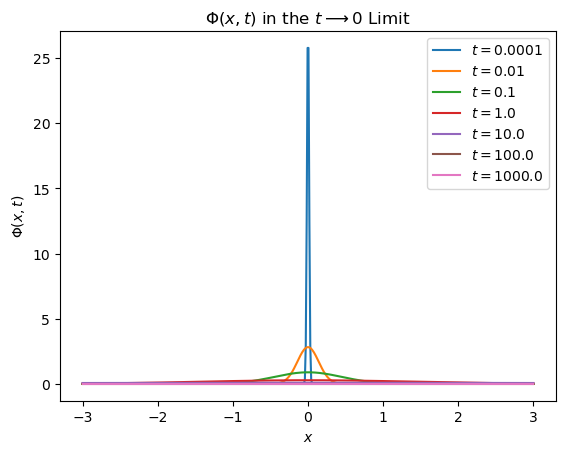

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Fundamental solution, Phi
def fundamental_soln(x,t,alpha):
    
    fs = np.exp(-x**2/(4*alpha*t))*(4*np.pi**alpha*t)**-0.5
    return fs

# Plot with 'toy' parameters to demonstrate the behavior of the FS
x = np.linspace(-3,3,500)
t = np.array([1e-4,1e-2,1e-1,1e0,1e1,1e2,1e3])
alpha = 1

# PLot over several times
for time in t:
    
    y = fundamental_soln(x,time,alpha)
    plt.plot(x,y,label='$t = $' + str(time) )

# Plot parameters
plt.xlabel('$x$')
plt.ylabel('$\Phi(x,t)$')
plt.title('$\Phi(x,t)$ in the $t \longrightarrow 0$ Limit')
plt.legend(bbox_to_anchor=[1,1])
plt.show()

Notice that $\Phi$ immediately diffuses out from the point source at $(x,t)=(0,0)$. Now consider a case where $Q(x,t)=0$ and the initial condition is given by $f(x)=(x^3+x^2+x+1)e^{-x^2}$.

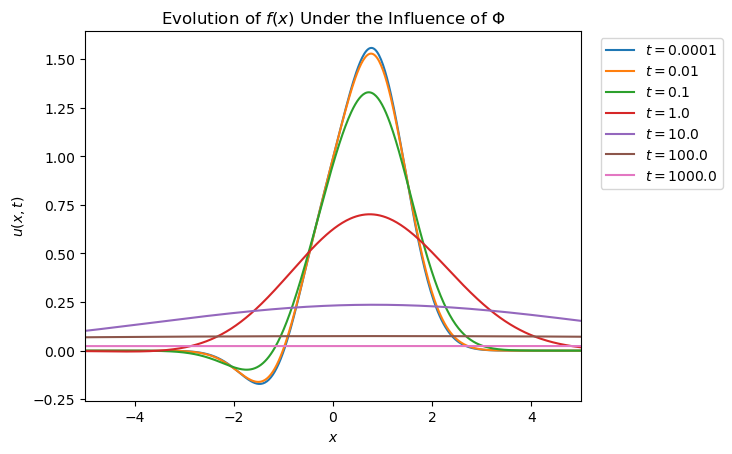

In [6]:
import scipy.integrate as integrate
from scipy.signal import convolve

# Plot with 'toy' parameters to demonstrate the behavior of the FS
[x,dx] = np.linspace(-10,10,1000,retstep='true')  # Need high spatial resolution for smaller t values
t = np.array([1e-4,1e-2,1e-1,1e0,1e1,1e2,1e3])
alpha = 1

# Initial condition
f = (x**3 + x**2 + x + 1)*np.exp(-x**2)


Phi = np.zeros([x.size,t.size])

for i in np.arange(0,t.size):
    # Approximate convolution integral with discrete convolution
    Phi[:,i] = convolve(f,fundamental_soln(x,t[i],alpha),mode='same',method='fft')*dx
    # Plot Phi
    plt.plot(x,Phi[:,i],label='$t = $' + str(t[i]) )

# PLot parameters
plt.xlabel('$x$')
plt.ylabel('$u(x,t)$')
plt.xlim([-5,5])
plt.title('Evolution of $f(x)$ Under the Influence of $\Phi$')
plt.legend(bbox_to_anchor=[1.3,1])
plt.show()


## Inverse Fourier Transform of a Gaussian 
We wish to calculate,

$$\ \mathcal{F}^{-1}\left\{ e^{-\alpha\omega^2t} \right\}=\frac{1}{\sqrt{2\pi}}\int_{\mathbb{R}^{}}{e^{-\alpha \omega^2t+i\omega x}}d\omega,$$

which can be done by completing the square on,

$$\ -\alpha\omega^2t+i\omega x$$

$$\ =\left(\sqrt{\alpha t}i\omega+\frac{1}{2\sqrt{\alpha t}}x\right)^2-\frac{x^2}{4\alpha t}.$$

Thus, plugging in this manipulation,

$$\ \mathcal{F}^{-1}\left\{ e^{-\alpha\omega^2t} \right\}=\frac{e^{-\frac{x^2}{4\alpha t}}}{\sqrt{2\pi}}\int_{\mathbb{R}^{}} e^{\left(\sqrt{\alpha t}i\omega+\frac{1}{2\sqrt{\alpha t}}x\right)^2} d\omega.$$

Letting, 

$$\ iz=\sqrt{\alpha t}i\omega+\frac{1}{2\sqrt{\alpha t}}x,$$
and, 

$$\ \frac{dz}{\sqrt{\alpha t}}=d\omega,$$ 

we have,

$$\ \mathcal{F}^{-1}\left\{ e^{-\alpha\omega^2t} \right\}=\frac{e^{-\frac{x^2}{4\alpha t}}}{\sqrt{2\pi \alpha t}}\int_{-\infty-\frac{ix}{2\sqrt{\alpha t}}}^{\infty-\frac{ix}{2\sqrt{\alpha t}}}e^{-z^2}dz.$$

The remaining integral requires calculus in the complex plane (complex
analysis), but in short, it evaluates to the Gaussian integral,
$\sqrt{\pi}$, giving,

$$\ \mathcal{F}^{-1}\left\{ e^{-\alpha\omega^2t} \right\}=\frac{e^{-\frac{x^2}{4\alpha t}}}{\sqrt{2\alpha t}}.$$

In more detail, the integral is taken over a contour, $\Gamma$, which
further decomposes into 4 curves, 

$$\ \Gamma = c_1 + c_2 + c_3 + c_4.$$

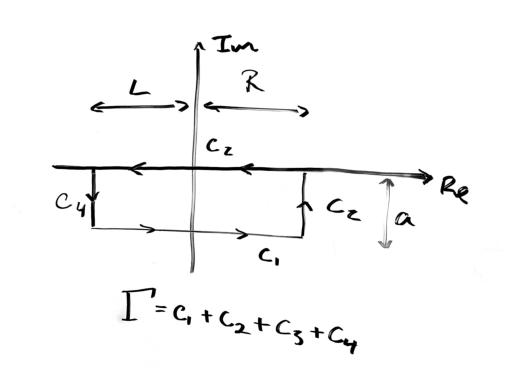

In [7]:
plt.imshow(plt.imread('Images\Gaussian_Contour_Int.jpg'))
plt.axis('off')
plt.show()

Since $\exp{\left(-z^2\right)}$ is an 'analytic' function (has a
convergent Taylor Series), a theorem called the Cauchy-Goursat Theorem
implies that any closed path integral in the complex plane evaluates to
0. This theorem is essentially a complex version of the Gradient Theorem
from multivariable calculus and the Fundamental Theorem of Calculus from
single variable calculus. We thus now have,

$$\ \int_{c_1}e^{-z^2}\, dz + \int_{c_2}e^{-z^2}\, dz + \int_{c_3}e^{-z^2}\, dz + \int_{c_4}e^{-z^2}\, dz = 0.$$

Let's first consider the integral over $c_2$ and $c_4$. We let,

$$\ a = \frac{x}{2\sqrt{\alpha t}},$$ 

giving,

$$\ \int_{c_2}e^{-z^2}\, dz =I_2= \lim_{R\to\infty}\int_{R-ia}^{R}e^{-z^2}\, dz,$$

$$\ \int_{c_4}e^{-z^2}\, dz =I_4= \lim_{L\to\infty}\int^{L-ia}_{L}e^{-z^2}\, dz.$$

We will only consider the integral over $I_2$ since $I_2$ and $I_4$
nearly identical. Notice the along $c_2$, 

$$\ z = R + iy,$$ 

and,

$$\ dz = idy,$$ 

for $-a \le y\le 0$. Thus, 

$$\begin{aligned}
    I_2 &= \lim_{R\to\infty}i\int_{R-ia}^{R}e^{-(R+iy)^2}\, dy\\
    &= \lim_{R\to\infty}i\int_{R-ia}^{R}e^{-R^2-2Ryi+y^2}\, dy\\
\end{aligned}$$ 

taking the magnitude of both sides,

$$\ \left|I_2\right| = \lim_{R\to\infty} \left|\int_{R-ia}^{R}e^{-R^2-2Ryi+y^2}\, dy\right|.$$

We wish to get an estimate of $\left|I_2\right|$, we may use the the
Cauchy-Schwarz inequality for this,

$$\ \left|\int_{R-ia}^{R}e^{-R^2-2Ryi+y^2}\, dy\right| \le \left|\int_{R-ia}^{R}e^{-R^2}\, dy\right|\left|\int_{R-
ia}^{R}e^{-2Ryi}\, dy\right|\left|\int_{R-ia}^{R}e^{y^2}\, dy\right|.$$

The first term is, 

$$\begin{aligned}
    \left|\int_{R-ia}^{R}e^{-R^2}\, dy\right| &= \left|e^{-R^2}\left(R-R+ia\right)\right|\\
    & = a e^{-R^2}.
\end{aligned}$$ 

The second term is (by the triangle inequality),

$$\begin{aligned}
    \left|\int_{R-ia}^{R}e^{-2Ryi}\, dy\right| &\le \left|\int_{R-ia}^{R}\left|e^{-2Ryi}\right|\, dy\right|\\
    & = \left|\left(R-R+ia\right)\right|\\
    & = a,
\end{aligned}$$ 

where $\left|e^{-2Ryi}\right|=1$ since $-2Ryi$ is a pure
phase with no real part. Finally, the third integral is,

$$\begin{aligned}
    \left|\int_{R-ia}^{R}e^{y^2}\, dy\right| &\le \left|\int_{R-ia}^{R}e^{a^2}\, dy\right|\\
    & = \left|e^{a^2}\left(R-R+ia\right)\right|\\
    & = a e^{a^2},
\end{aligned}$$ 

where we have used the fact that
$\left|y\right|\le \left|a\right|$. Thus,

$$\  \lim_{R\to\infty} \left|\int_{R-ia}^{R}e^{-R^2-2Ryi+y^2}\, dy\right| \le \lim_{R\to\infty} a^3 e^{a^2} e^{-R^2}=0.$$

We may therefore conclude $\left|I_2\right|\to0$ as $R\to\infty$ and
furthermore, 

$$\int_{c_2}e^{-z^2}\, dz = \int_{c_4}e^{-z^2}\, dz = 0,$$

as $R,L\to\infty$. Thus, we now have,

$$\ \int_{c_1}e^{-z^2}\, dz + \int_{c_3}e^{-z^2}\, dz = 0.$$ 

The integral over $c_3$ is, 

$$\begin{aligned}
    \int_{c_3}e^{-z^2}\, dz &= \lim_{R,L\to\infty}\int_{R}^{-L}e^{-z^2}\, dz\\
    &= \lim_{R,L\to\infty}-\int^{R}_{-L}e^{-z^2}\, dz\\
    &= -\sqrt{\pi},
\end{aligned}$$ 

Thus, we have finally proved,

$$\ \int_{c_1}e^{-z^2}\, dz = \int_{-\infty-\frac{ix}{2\sqrt{\alpha t}}}^{\infty-\frac{ix}{2\sqrt{\alpha t}}}e^{-z^2}\,dz = \sqrt{\pi}.$$